<a href="https://colab.research.google.com/github/anfisbena/MIAD/blob/main/LAB2/LABORATORIO_Enunciado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![miad4.png](https://github.com/anfisbena/MIAD/blob/main/LAB2/Archivos/miad4.png?raw=1)

# Laboratorio 2

## Desarrollo de una herramienta analítica usando paquetes especializados para análisis de datos en Python

Para el desarrollo de esta actividad puedes utilizar cualquier librería externa. Te recomendamos leer por completo el enunciado del laboratorio antes de comenzar, de forma que tengas claro el propósito global de la actividad y puedas desarrollar tu solución apuntando a él desde el inicio.

Al desarrollar este laboratorio pondrás a prueba tus habilidades para:

1. Identificar y abordar preguntas de negocio y de *analytics*.
2. Leer datos desde archivos y almacenarlos utilizando métodos de librerías especializadas.
3. Explorar, modificar, limpiar y unir objetos tablas de datos.
4. Implementar análisis combinando métricas descriptivas, visualización, filtrado y agrupación.
5. Implementar análisis basado en modelos estadísticos o de *machine learning*.

##  Contexto: desigualdad y factores de éxito en pruebas Saber 11 en Colombia

El ICFES es el Instituto Colombiano para el Fomento de la Educación Superior y está adscrito al Ministerio de Educación a nivel nacional. Como parte de sus funciones, el ICFES administra las pruebas Saber 11, las cuales evalúan a todos los estudiantes del país al final de su educación secundaria. El examen contiene preguntas que evalúan una variedad de áreas del conocimiento (ej., matemáticas, física, inglés, etc.) y se lleva a cabo dos veces al año, ajustándose a los diferentes calendarios académicos que siguen las instituciones educativas. Al momento de inscribirse a las pruebas, los estudiantes diligencian un formulario que recoge información sociodemográfica y relacionada con la institución a la que pertenecen. El fin es obtener información con respecto al desempeño de los estudiantes en la prueba y de sus características.

![msaberpro.png](https://github.com/anfisbena/MIAD/blob/main/LAB2/Archivos/saberpro.png?raw=1)

Al igual que otros países de la región, Colombia tiene grandes retos en términos de desigualdad, particularmente en el contexto de educación primaria y secundaria. Por esta razón, para el Estado colombiano es muy valioso el amplio registro de datos que el ICFES genera alrededor de las pruebas Saber 11, pues con ellos se pueden generar análisis sobre la calidad de la educación en el país y eventualmente dar lugar a recomendaciones sobre políticas públicas. En particular, la problemática a abordar en este caso de estudio es la desigualdad y factores de éxito en las pruebas Saber 11.

Los objetivos de este caso de estudio son:

* Entender el contenido de los archivos de datos proporcionados sobre las pruebas Saber 11, generar un reporte acerca de sus características principales y seleccionar las partes de dicho contenido que podrían ser relevantes para el análisis.


* Identificar características de las variables de interés y relaciones entre ellas, por ejemplo, a través de agrupación, visualizaciones y estadísticas descriptivas.


* Proponer un modelo que busque relacionar las variables de interés con el desempeño de los estudiantes y concluir acerca de los posibles hallazgos que se podrían reportar para el *stakeholder*.


* Generar una herramienta que permita a un usuario interactuar con alguno de los parámetros del análisis realizado de forma relevante en el contexto del problema.

## Fase 1: obtener e inspeccionar archivos

En esta fase te harás una idea general del contenido de los datos y generarás un reporte al respecto (ej., imprimiendo mensajes, presentando tablas de resumen, etc.). Además, seleccionarás un segmento de los datos que consideres útil para realizar tu análisis.

Pautas generales:

* Utilizar una librería especializada para leer los archivos de datos y agregarlos según sea necesario (ej., utilizando los métodos `append` o `concat` si eliges cargarlos utilizando la librería `pandas`).
* Inspeccionar el archivo a partir de sus encabezados, columnas y descripciones de las variables según su tipo (ej., numéricas, categóricas).
* Declarar una estructura de datos (ej., una lista) para almacenar un subconjunto de variables que puedan ser relevantes para la problemática de interés.

Preguntas guía:

* ¿Qué dimensiones tienen los datos?
* ¿Con cuántos años y periodos de evaluación se cuenta?
* ¿Cuáles variables pueden ser de interés para la problemática planteada?
* ¿Qué porcentaje de datos faltantes o no válidos hay en las columnas de interés? ¿Qué planteas para manejarlos?

<h1>Librerias de Python utilizadas</h1>

In [ ]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import ipywidgets as widgets
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import missingno as msno
from datetime import datetime

<h1>Funciones de Python diseñadas para abordar el caso</h1>

In [ ]:
from math import nan
### Función para leer los datos de la API, recibe como parámetro el número de registros a leer

def data(yinicial,yfinal,samples):
  result=[]
  for year in range(yinicial,yfinal+1):
    print(f'Procesando año {year}')
    for period in range(1, 5):
        df=pd.read_json(f'https://www.datos.gov.co/resource/kgxf-xxbe.json?$limit=100000&periodo={year}{period}')
        if not df.empty:
          df.dropna(subset=variables_independientes_globales)
          for variable in variables_dependientes_globales:
            df[variable].fillna(df[variable].mean(), inplace=True)
          df['year'] = year
          df['period'] = period
          sample = df.sample(n=samples,random_state=420)
          result.append(sample)
          del df
  return pd.concat(result, ignore_index=True)

###Funciones para desplegar graficos
def pie_conteo_estudiantes(variable_independiente):
  data=dataset
  fig=go.Figure()
  resultados={}
  unique_values=sorted(data[variable_independiente].unique(),key=lambda x: str(x))
  for variable in unique_values:
    resultados[variable]=data[data[variable_independiente]==variable][variable_independiente].count()
  fig.add_trace(go.Pie(labels=tuple(resultados.keys()),values=tuple(resultados.values()),name=str(variable)))
  fig.update_traces(hole=0.4, hoverinfo="value+label")
  fig.update_layout(title=f'Cantidad de estudiantes por {variable_independiente}',autosize=True)
  return fig.show()

def pie_dinamico_1variable(variable_independiente, variable_dependiente,filtro):
  data=dataset
  resultados = {}
  fig = go.Figure()
  unique_values_independiente = sorted(data[variable_independiente].unique(), key=lambda x: str(x))
  for independiente in unique_values_independiente:
      resultados[independiente] = data[(data[variable_dependiente]==filtro) & (data[variable_independiente]==independiente)][variable_independiente].count()
  fig.add_trace(go.Pie(labels=tuple(resultados.keys()), values=tuple(resultados.values())))
  fig.update_traces(hole=0.4, hoverinfo="value+label")
  fig.update_layout(title=f'Gráfico de Pastel de {variable_independiente} en {variable_dependiente} cuyo valor sea {filtro}',autosize=True)
  return fig.show()

def violin_dinamico_top(cole_jornada,fami_estratovivienda,fami_educacionmadre,fami_educacionpadre,cole_calendario,puntaje):
    data = dataset
    fig = go.Figure()
    query=data[(data['cole_jornada']==cole_jornada)&(data['fami_estratovivienda']==fami_estratovivienda)&(data['fami_educacionmadre']==fami_educacionmadre)&(data['fami_educacionpadre']==fami_educacionpadre)&(data['cole_calendario']==cole_calendario)][puntaje]
    fig.add_trace(go.Violin(y=query, name=puntaje))
    fig.update_layout(title=f"{puntaje} para estudiantes en jornada {cole_jornada} de {fami_estratovivienda} con educacion de padres {fami_educacionmadre} en calendario {cole_calendario}",xaxis_title="Poblacion",yaxis_title=f"{puntaje}")
    return fig.show()

def boxplot_dinamico(variable_dependiente,variable_independiente):
  data=dataset
  fig=go.Figure()
  unique_values=sorted(data[variable_independiente].unique(), key=lambda x: str(x))
  for variable in unique_values:
    fig.add_trace(go.Box(y=data[data[variable_independiente]==variable][variable_dependiente],name=str(variable)))
  fig.update_layout(title=f"{variable_dependiente} por {variable_independiente}", xaxis_title=f"{variable_independiente}", yaxis_title=f"{variable_dependiente}")
  return fig.show()

def violin_dinamico(variable_dependiente,variable_independiente):
  data=dataset
  fig=go.Figure()
  unique_values=sorted(data[variable_independiente].unique(), key=lambda x: str(x))
  for variable in unique_values:
    fig.add_trace(go.Violin(y=data[data[variable_independiente]==variable][variable_dependiente],name=str(variable)))
  fig.update_layout(title=f"{variable_dependiente} por {variable_independiente}", xaxis_title=f"{variable_independiente}", yaxis_title=f"{variable_dependiente}",autosize=True)
  return fig.show()

def boxplot_dinamico_tendencia(variable_dependiente, variable_independiente):
    data = dataset
    fig = go.Figure()
    unique_values = sorted(data[variable_independiente].unique(), key=lambda x: str(x))
    for variable in unique_values:
        fig.add_trace(go.Box(y=data[data[variable_independiente] == variable][variable_dependiente], name=str(variable)))
    means = data.groupby(variable_independiente)[variable_dependiente].mean()
    fig.add_trace(go.Scatter(x=unique_values,y=means,mode='lines+markers',name='Media',line=dict(color='red', width=1)))
    fig.update_layout(title=f"{variable_dependiente} por {variable_independiente}",xaxis_title=f"{variable_independiente}",yaxis_title=f"{variable_dependiente}")
    return fig.show()

def violin_dinamico_tendencia(variable_dependiente, variable_independiente):
    data = dataset
    fig = go.Figure()
    unique_values = sorted(data[variable_independiente].unique(), key=lambda x: str(x))
    for variable in unique_values:
        fig.add_trace(go.Violin(y=data[data[variable_independiente] == variable][variable_dependiente], name=str(variable)))
    means = data.groupby(variable_independiente)[variable_dependiente].mean()
    fig.add_trace(go.Scatter(x=unique_values,y=means,mode='lines+markers',name='Media',line=dict(color='red', width=1)))
    fig.update_layout(title=f"{variable_dependiente} por {variable_independiente}",xaxis_title=f"{variable_independiente}",yaxis_title=f"{variable_dependiente}")
    return fig.show()

def bar_materias(segmentacion):
  data=dataset
  subjects=[elemento for elemento in variables_dependientes_globales if elemento != 'punt_global']
  resultados={}
  fig=go.Figure()
  unique_values=sorted(data[segmentacion].unique(), key=lambda x: str(x))
  for variable in unique_values:
    resultados[variable]=[]
    for subject in subjects:
      subject_mean=data[data[segmentacion]==variable][subject].mean()
      resultados[variable].append(subject_mean)
    fig.add_trace(go.Bar(x=subjects,y=resultados[variable],name=variable))
  fig.update_layout(title=f"Puntaje de categorias por {segmentacion}", xaxis_title=f"materias", yaxis_title=f"puntaje")
  return fig.show()

def bar_dinamico_independientes(variable_dependiente,variable_independiente):
  data=dataset
  result={}
  fig=go.Figure()
  vd_organizada=sorted(data[variable_dependiente].unique(), key=lambda x: str(x))
  vi_orgnizada=sorted(data[variable_independiente].unique(), key=lambda x: str(x))
  for independiente in vi_orgnizada:
    result[independiente]={}
    for dependiente in vd_organizada:
       result[independiente][dependiente]=data[(data[variable_dependiente]==dependiente) & (data[variable_independiente]==independiente)][variable_independiente].count()
    fig.add_trace(go.Bar(x=tuple(result[independiente].keys()),y=tuple(result[independiente].values()),name=independiente))
  fig.update_layout(title=f"relacion {variable_dependiente} - {variable_independiente}", xaxis_title=f"{variable_dependiente}", yaxis_title=f"{variable_independiente}",autosize=True)
  return fig.show()

def bar_comparativo(variable_dependiente,variable_independiente,puntaje):
  data=dataset
  result={}
  fig=go.Figure()
  unique_values = sorted(data[variable_independiente].unique(), key=lambda x: str(x))
  for independiente in unique_values:
    result[independiente]={}
    periods=data[data[variable_independiente]==independiente][variable_dependiente].unique()
    for period in periods:
      result[independiente][period]=data[(data[variable_independiente]==independiente) & (data[variable_dependiente]==period)][puntaje].mean()
    fig.add_trace(go.Bar(x=tuple(result[independiente].keys()),y=tuple(result[independiente].values()),name=str(independiente)))
  fig.update_layout(title=f"Promedio de puntaje anual por periodo", yaxis_title=f"puntaje",autosize=True)
  return fig.show()

def pie_dinamico(objetivos, segmentacion):
  data=dataset
  resultados = {}
  unique_values_objetivo = sorted(data[objetivos].unique(), key=lambda x: str(x))
  unique_values_segmentacion = sorted(data[segmentacion].unique(), key=lambda x: str(x))
  for segmento in unique_values_segmentacion:
    fig = go.Figure()  # Crear una nueva figura para cada segmento
    resultados[segmento] = {}
    for objetivo in unique_values_objetivo:
        resultados[segmento][objetivo] = data.query(f'{segmentacion}=="{segmento}" & {objetivos}=="{objetivo}"')[objetivos].count()
    fig.add_trace(go.Pie(labels=tuple(resultados[segmento].keys()), values=tuple(resultados[segmento].values())))
    fig.update_traces(hole=0.4, hoverinfo="label+percent+name")
    fig.update_layout(title=f'Gráfico de Pastel para {segmento}',width=800,height=400)
    fig.show()

def pie_rsquare(resultados):
  fig = go.Figure()  # Crear una nueva figura para cada segmento
  fig.add_trace(go.Pie(labels=tuple(resultados.keys()), values=tuple(resultados.values())))
  fig.update_traces(hole=0.4, hoverinfo="label+percent+name")
  fig.update_layout(title=f'Resultado R2 de regresion linear de variables independientes ante puntaje global',autosize=True)
  return fig.show()

def bar_rsquare(resultados):
  res_ordenado=dict(sorted(resultados.items(), key=lambda item: item[1], reverse=True))
  x=tuple(res_ordenado.keys())
  y=tuple(res_ordenado.values())
  fig=go.Figure()
  fig.add_trace(go.Bar(x=x,y=y))
  fig.update_layout(title=f"Puntaje R2 por variables indepentientes", xaxis_title=f"Variable", yaxis_title=f"R2")
  return fig.show()

###Funciones estadisticas

def regresion(independiente,dependiente):
  rcuadrado={}
  for var_independiente in independiente:
    data = dataset[[dependiente,var_independiente]].copy()
    data = pd.get_dummies(data, columns=[var_independiente], drop_first=True)
    for col in data.columns:
      new_col_name = col.replace(f'{var_independiente}_', '')
      data.rename(columns={col: new_col_name}, inplace=True)
    data[dependiente].fillna(data[dependiente].mean(), inplace=True)
    X = data.drop(columns=[dependiente])
    y = data[dependiente]
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    rcuadrado[var_independiente]=model.rsquared
  return (model,rcuadrado)

def prediccion_estrato(dependiente,estrato_a_predecir):
  independiente="fami_estratovivienda"
  data = dataset[[dependiente,independiente]].copy()
  data = pd.get_dummies(data, columns=[independiente], drop_first=True)
  for col in data.columns:
    new_col_name = col.replace(f'{independiente}_', '')
    data.rename(columns={col: new_col_name}, inplace=True)
  X = data.drop(columns=[dependiente])  # Variables independientes (estrato dummy)
  y = data[dependiente]  # Variable dependiente (puntaje)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  model = LinearRegression()
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  mse = mean_squared_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)
  print(f'Mean Squared Error (MSE): {mse:.2f}')
  print(f'R-squared (R2): {r2:.2f}')
  # Prediccion
  nuevo_estrato = [[0,0,0,0,0,0]]  #Se puede hacer dinamico agregando una variable en el ciclo for que genere un array con 0's, no se desarrolla en esta version
  nuevo_estrato[0][estrato_a_predecir-1]=1
  estrato=f"Estrato {estrato_a_predecir}"
  puntaje_predicho = model.predict(nuevo_estrato)
  return (f'Puntaje predicho para el {estrato}: {puntaje_predicho[0]:.2f}, el puntaje medio para este segmento es {round(dataset[dataset[independiente]==estrato][dependiente].mean(),2)} y su moda es {round(dataset[dataset[independiente]==estrato][dependiente].mode()[0],2)}')



<h1>Proposito del estudio</h1>
El objetivo de este estudio es identificar que variables afectan principalmente a nuestros jovenes, este es un analisis exploratorio que permite ver el problema desde distintas aristas y concluir cuales serían las mejores condiciones para que un estudiante tenga un resultado optimo basado en un analisis exploratorio.

<h1>Introduccion</h1>
la prueba saber 11 es un examen nacional de caracter obligatorio para todos aquellos estudiantes que deseen recibir sus grados de educación media, asi mismo captura datos personales:
<ul>
<li>ordinarios</li>
<li>sensibles</li>
<li>familiares</li>
<li>socio-economicos</li>
<li>demograficos</li>
</ul>

Estos datos son libres al publico y pueden ser hallados tanto en la pagina del ICFES como en Datos.gov.co.

Usaremos una base de datos especializada de <a href='https://www.datos.gov.co/Educaci-n/Resultados-nicos-Saber-11/kgxf-xxbe'>Datos.gov.co</a>, con aproximadamente 7.1 millones de filas de datos históricos del ICFES (Saber 11) desde 2010 hasta 2022. Se recomienda utilizar datos a partir de 2015 debido a cambios en las columnas.

El script se encarga de sacar una muestra aleatoria poblacional que el usuario asigna.

<b>NOTA:</b> <i>El codigo utilizado se diseño de forma tal que sea dinamico y usable para evaluar cualquier n posibles combinaciones, simplemente cambiando las variables de entrada.</i>

<h1>Variables identificadas</h2>
De las 51 columnas disponibles para comparar la informacion, se tomaron aquellas que a criterio subjetivo del evaluador, tienen mas relevancia para el analisis de datos y se clasificaron:

<ul>
  <li>
    <b>Variables independientes:</b> Todas aquellas no directamente involucradas en el resultado pero que pueden identificar y segmentar al evaluado y dar un contexto de su perfil, estas por lo general son valores String.
  </li>
  <li>
    <b>Varibles dependientes:</b> Todas aquellas que son resultado directo de la prueba saber pro y que clasifican al evaluado, estas son usualmente int y float
  </li>

In [ ]:
variables_independientes_globales=["cole_calendario","cole_calendario","cole_caracter","cole_depto_ubicacion","cole_genero","cole_jornada","cole_mcpio_ubicacion","cole_naturaleza",
                          "estu_depto_reside","estu_genero","estu_mcpio_reside","estu_privado_libertad",
                          "fami_cuartoshogar","fami_educacionmadre","fami_educacionpadre","fami_estratovivienda","fami_personashogar","fami_tieneautomovil","fami_tienecomputador","fami_tieneinternet","fami_tienelavadora"]

variables_dependientes_globales=["punt_ingles","punt_matematicas","punt_sociales_ciudadanas","punt_c_naturales","punt_lectura_critica","punt_global"]


<h1>Tamaño de muestra</h1>
Para el ejercisio se tomaran datos desde 2015 a 2022, incuyendo todos los periodos que estén entre estos y en cada uno se usarán 10000 muestras aleatorias.

In [ ]:
yinicio=2015
yfinal=2022
samples=10000
dataset= data(yinicio,yfinal,samples)
dataset.head()

Procesando año 2015
Procesando año 2016
Procesando año 2017
Procesando año 2018
Procesando año 2019
Procesando año 2020
Procesando año 2021
Procesando año 2022


periodo estu_tipodocumento  estu_consecutivo cole_area_ubicacion  \
0    20151                 TI  SB11201510042121              URBANO   
1    20151                 CC  SB11201510084248              URBANO   
2    20151                 CC  SB11201510080384              URBANO   
3    20151                 CC  SB11201510042010              URBANO   
4    20151                 TI  SB11201510046222              URBANO   

  cole_bilingue cole_calendario      cole_caracter  \
0             N               B            TÉCNICO   
1             N               A          ACADÉMICO   
2             N               A          ACADÉMICO   
3             N               A          ACADÉMICO   
4             N               B  TÉCNICO/ACADÉMICO   

   cole_cod_dane_establecimiento  cole_cod_dane_sede  \
0                   3.760010e+11        376001019201   
1                   1.765200e+11        176520002708   
2                   3.630010e+11        363001002797   
3                   3.660010e+11        366001006741   
4                   3.760010e+11        376001007670   

   cole_cod_depto_ubicacion  ...  fami_tienelavadora  desemp_ingles  \
0                        76  ...                  Si             A-   
1                        76  ...                  Si             A-   
2                        63  ...                  No             A-   
3                        66  ...                  Si             A-   
4                        76  ...                  Si             A2   

  punt_ingles punt_matematicas punt_sociales_ciudadanas punt_c_naturales  \
0        45.0               43                       52               51   
1        42.0               47                       59               54   
2        49.0               41                       33               32   
3        45.0               55                       43               43   
4        68.0               69                       68               76   

  punt_lectura_critica punt_global  year period  
0                   58         253  2015      1  
1                   55         264  2015      1  
2                   43         191  2015      1  
3                   55         243  2015      1  
4                   70         353  2015      1  

[5 rows x 53 columns]


## Fase 2: identificar características y relaciones en las variables

En esta fase realizarás análisis descriptivo para identificar posibles patrones o relaciones entre las variables de interés para la problemática planteada. Además, expondrás estadísticas descriptivas y visualizaciones para concluir al respecto de los patrones y las relaciones identificadas. Finalmente, elegirás el segmento de los datos sobre el cual profundizarás con tu análisis (este puede ser, o no, igual al seleccionado anteriormente).

Pautas generales:

* Calcular estadísticas descriptivas básicas (por lo menos, media/mediana y varianza/desviación) para cada variable sociodemográfica relevante en el contexto del problema.
* Utilizar librerías especializadas (ej., `matplotlib`, `seaborn`, etc.) para inspeccionar visualmente variables de interés. Los métodos `distplot`, `pairplot`, `boxplot`, o `violinplot`, entre otros, pueden ser útiles.
* Utilizar el método `groupby` de `pandas`, en conjunto con métodos de visualización, puede proveer evidencia del impacto de las variables sociodemográficas de interés sobre el desempeño de los estudiantes en la prueba.

Preguntas guía:

* ¿Hay patrones de interés en las distribuciones de las variables o en las relaciones entre ellas?
* ¿Consideras que existe algún impacto significativo de variables sociodemográficas en los puntajes globales o por área?
* ¿Sobre cuáles variables harías un análisis más profundo?

<h2>Limpieza de datos</h2>
Asi mismo se muestran graficamente los datos nulos o NaN, se debe tomar en cuenta que las columnas a evaluar fueron previamente tratadas para que la calidad de los datos sea la mejor posible

<Axes: >

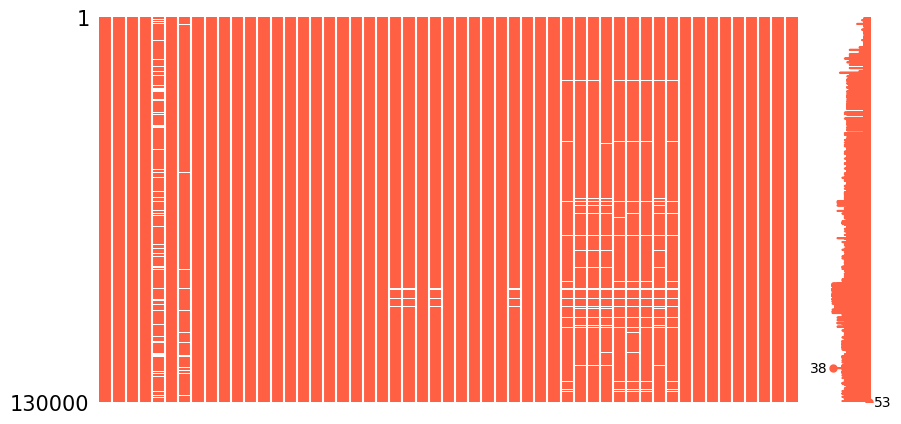

In [ ]:
msno.matrix(dataset, figsize=(10,5), fontsize=12,color=(1, 0.38, 0.27))

<h1>Puntaje Global por año</h1>

Se ha analizado el puntaje global por año y se han observado varias tendencias interesantes. En general, se ha notado un aumento en el desempeño de los estudiantes a lo largo de los años, a pesar de una disminución en 2022 en comparación con los años anteriores. También se ha identificado una tendencia creciente durante los años en que los estudiantes estuvieron confinados por la COVID-19 (2019-2021), lo que plantea la hipótesis de si los estudiantes aprenden más en casa que de manera presencial.

Además, se ha observado que en 2022 hubo una distribución dispersa de puntajes con picos máximos o mínimos menos dispersos en comparación con años anteriores. También se ha notado que aquellos que realizan el examen en el primer período obtienen puntajes más altos en comparación con otros períodos. Se planea realizar un análisis más detallado para comprender mejor estas tendencias.

In [ ]:
violin_dinamico_tendencia('punt_global','year')
violin_dinamico_tendencia('punt_global','period')

<h1>Exploracion de variables</h1>
Se procede a explorar la muestra de manera grafica, tomando en cuenta las 5 variables independientes mas representativas para el estudio
<ol>
<li>cole_jornada</li>
<li>fami_estratovivienda</li>
<li>fami_educacionmadre</li>
<li>fami_educacionpadre</li>
<li>cole_calendario</li>
</ol>

Nota: En el punto 3, grafica <i>Puntaje R2 por variables independientes</i> puede encontrar la distribucion R2 de estas y otros datos relevantes

<h1>1. Jornada del colegio</h1>
Para esta variable identificamos que el grueso poblacional escoje entre jornada completa y mañana.

Tradicionalmente los colegios en Colombia, en su mayoria cuentan con tres jornadas para el caso de estudiantes regulares:
<ul>
<li>Mañana(06:00-12:00)</li>
<li>Tarde(12:00-17:00)</li>
<li>Completa(09:00-17:00)</li>
</ul>

Nota: información extraida de <a href='https://www.mineducacion.gov.co/portal/micrositios-preescolar-basica-y-media/Educacion-Privada/Calidad/364691:Calendario-y-Jornada-Escolar'>MiniEducacion</a>

Para el caso de estudiantes que decidan validar o concluir sus estudios de forma mas rapida, se prestan horarios especiales que les permitan trabajar y estudiar, como se ven en los demas horarios

In [ ]:
pie_conteo_estudiantes('cole_jornada')
modelo,r2_resultado=regresion(['cole_jornada'],"punt_global")
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            punt_global   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.335
Method:                 Least Squares   F-statistic:                 1.309e+04
Date:                Sat, 30 Sep 2023   Prob (F-statistic):               0.00
Time:                        15:46:01   Log-Likelihood:            -6.9353e+05
No. Observations:              130000   AIC:                         1.387e+06
Df Residuals:                  129994   BIC:                         1.387e+06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        321.7861      0.219   1472.684      0.000     321.358     322.214
MAÑANA       -55.7598      0.316   -176.371      0.000     -56.379     -55.140
NOCHE       -101.1933      0.662   -152.813      0.000    -102.491     -99.895
SABATINA    -103.6141      0.582   -177.994      0.000    -104.755    -102.473
TARDE        -68.6516      0.590   -116.347      0.000     -69.808     -67.495
UNICA        -61.0503      0.713    -85.638      0.000     -62.448     -59.653
==============================================================================
Omnibus:                      145.791   Durbin-Watson:                   1.848
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              140.388
Skew:                          -0.063   Prob(JB):                     3.27e-31
Kurtosis:                       2.901   Cond. No.                         6.10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<h2>Variables de interes</h2>

Se ha evaluado el rendimiento en las pruebas ICFES en relación con diferentes variables dentro del segmento. Se destaca que el grupo que obtiene los mejores resultados son los estudiantes de jornada completa.

Los estudiantes eligen su jornada de estudio basándose en varias consideraciones, como disponibilidad de tiempo e intereses personales, pero una variable que se ha analizado es la capacidad económica. Se ha realizado un análisis cruzado de la jornada escolar con el estrato socioeconómico en el que viven los estudiantes. Esto ha revelado que el 70.7% de los estudiantes que asisten a colegios de jornada completa tienen un buen poder adquisitivo.

In [ ]:
violin_dinamico_tendencia('punt_global','cole_jornada')
pie_dinamico_1variable('fami_estratovivienda', 'cole_jornada','COMPLETA')

<h1>2. Estrato de la vivienda</h1>

El estrato socio-economico de la vivienda en Colombia se cataloga en 6 niveles ascendentes que intentan medir el poder adquisitivo de la persona:

<ul>
<li>Estrato 1</li>
<li>Estrato 2</li>
<li>Estrato 3</li>
<li>Estrato 4</li>
<li>Estrato 5</li>
<li>Estrato 6</li>
</ul>

Los estratos donde se suelen destinar mas apoyos del gobierno son  1,2 y 3, la clase media suelen ser usualmente 4 o 5 y los estratos con mayor poder adquisitivo son los 6.  Esto no quiere decir que se pueda segmentar la capacidad adquisitiva de un individuo netamente por esta variable.

In [ ]:
pie_conteo_estudiantes('fami_estratovivienda')
modelo,r2_resultado=regresion(['fami_estratovivienda'],"punt_global")
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            punt_global   R-squared:                       0.324
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                 1.039e+04
Date:                Sat, 30 Sep 2023   Prob (F-statistic):               0.00
Time:                        15:46:03   Log-Likelihood:            -6.9457e+05
No. Observations:              130000   AIC:                         1.389e+06
Df Residuals:                  129993   BIC:                         1.389e+06
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         240.4637      0.308    780.274      0.000     239.860     241.068
Estrato 2      16.9613      0.429     39.535      0.000      16.120      17.802
Estrato 3      39.3190      0.432     91.008      0.000      38.472      40.166
Estrato 4      72.3385      0.491    147.389      0.000      71.377      73.300
Estrato 5      89.0241      0.526    169.207      0.000      87.993      90.055
Estrato 6      99.5441      0.537    185.205      0.000      98.491     100.598
Sin Estrato    -0.7983      1.326     -0.602      0.547      -3.398       1.801
==============================================================================
Omnibus:                       10.284   Durbin-Watson:                   1.937
Prob(Omnibus):                  0.006   Jarque-Bera (JB):               10.294
Skew:                          -0.021   Prob(JB):                      0.00582
Kurtosis:                       2.992   Cond. No.                         10.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<h2>Variables de interes</h2>

Se ha evaluado el rendimiento en las pruebas ICFES en relación con diferentes variables dentro del segmento. Se destaca que el grupo que obtiene los mejores resultados son los estudiantes de Estrato 6.

Tambien se identifica que los estudiantes a medida que baja el estrato, baja su media de puntaje, asi como su distribución

In [ ]:
violin_dinamico_tendencia('punt_global','fami_estratovivienda')
bar_materias('fami_estratovivienda')
modelo,r2_resultado=regresion(['fami_estratovivienda'],"punt_global")
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            punt_global   R-squared:                       0.324
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                 1.039e+04
Date:                Sat, 30 Sep 2023   Prob (F-statistic):               0.00
Time:                        17:13:25   Log-Likelihood:            -6.9457e+05
No. Observations:              130000   AIC:                         1.389e+06
Df Residuals:                  129993   BIC:                         1.389e+06
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         240.4637      0.308    780.274      0.000     239.860     241.068
Estrato 2      16.9613      0.429     39.535      0.000      16.120      17.802
Estrato 3      39.3190      0.432     91.008      0.000      38.472      40.166
Estrato 4      72.3385      0.491    147.389      0.000      71.377      73.300
Estrato 5      89.0241      0.526    169.207      0.000      87.993      90.055
Estrato 6      99.5441      0.537    185.205      0.000      98.491     100.598
Sin Estrato    -0.7983      1.326     -0.602      0.547      -3.398       1.801
==============================================================================
Omnibus:                       10.284   Durbin-Watson:                   1.937
Prob(Omnibus):                  0.006   Jarque-Bera (JB):               10.294
Skew:                          -0.021   Prob(JB):                      0.00582
Kurtosis:                       2.992   Cond. No.                         10.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<h1>3. Educacion de la madre</h1>

El nivel educativo de la madre puede influir significativamente en los resultados del examen ICFES de un estudiante, ya que una educación materna más alta a menudo da ejemplo al nucleo familiar y podría incidir con un mejor rendimiento académico.

Se identifica que mas del 60% de las madres completaron sus estudios y de los grupos, el mas grande es de aquellas profesionales.

In [ ]:
pie_conteo_estudiantes('fami_educacionmadre')
modelo,r2_resultado=regresion(['fami_educacionmadre'],"punt_global")
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            punt_global   R-squared:                       0.321
Model:                            OLS   Adj. R-squared:                  0.321
Method:                 Least Squares   F-statistic:                     5576.
Date:                Sat, 30 Sep 2023   Prob (F-statistic):               0.00
Time:                        16:33:01   Log-Likelihood:            -6.9491e+05
No. Observations:              130000   AIC:                         1.390e+06
Df Residuals:                  129988   BIC:                         1.390e+06
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                  308.3364      0.261   1179.840      0.000     307.824     308.849
Educación profesional incompleta        -7.9409      0.803     -9.885      0.000      -9.515      -6.366
Ninguno                                -90.8122      1.260    -72.071      0.000     -93.282     -88.343
No Aplica                              -37.8907      3.749    -10.106      0.000     -45.239     -30.542
No sabe                                -27.0056      0.969    -27.860      0.000     -28.906     -25.106
Postgrado                               34.8640      0.498     70.062      0.000      33.889      35.839
Primaria completa                      -72.4207      0.614   -118.020      0.000     -73.623     -71.218
Primaria incompleta                    -78.1577      0.573   -136.367      0.000     -79.281     -77.034
Secundaria (Bachillerato) completa     -47.8673      0.415   -115.339      0.000     -48.681     -47.054
Secundaria (Bachillerato) incompleta   -61.0620      0.548   -111.420      0.000     -62.136     -59.988
Técnica o tecnológica completa         -24.3438      0.543    -44.867      0.000     -25.407     -23.280
Técnica o tecnológica incompleta       -34.0603      0.936    -36.398      0.000     -35.894     -32.226
==============================================================================
Omnibus:                      320.288   Durbin-Watson:                   1.895
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              322.683
Skew:                          -0.121   Prob(JB):                     8.52e-71
Kurtosis:                       3.033   Cond. No.                         27.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<h2>Variables de interes</h2>

Se identifica que a mayor nivel de estudios, mayor puntaje medio del ICFES por parte de los estudiantes, aparentemente a educacion y los valores del estudio en el hogar influyen, tambien se ve que a mayor nivel educativo, mas cerrada es la distribucion de puntajes, el mejor desempeño se identifica en aquellos evaluados cuyas madres tienen un postgrado.

Se hizo un analisis de estratos para el mejor resultado del experimento y se halló que las mamas con postgrado habitan en los estratos economicos mas altos.

In [ ]:
violin_dinamico_tendencia('punt_global','fami_educacionmadre')
pie_dinamico_1variable('fami_estratovivienda','fami_educacionmadre','Postgrado')
modelo,r2_resultado=regresion(['fami_educacionmadre'],"punt_global")
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            punt_global   R-squared:                       0.321
Model:                            OLS   Adj. R-squared:                  0.321
Method:                 Least Squares   F-statistic:                     5576.
Date:                Sat, 30 Sep 2023   Prob (F-statistic):               0.00
Time:                        15:46:09   Log-Likelihood:            -6.9491e+05
No. Observations:              130000   AIC:                         1.390e+06
Df Residuals:                  129988   BIC:                         1.390e+06
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                  308.3364      0.261   1179.840      0.000     307.824     308.849
Educación profesional incompleta        -7.9409      0.803     -9.885      0.000      -9.515      -6.366
Ninguno                                -90.8122      1.260    -72.071      0.000     -93.282     -88.343
No Aplica                              -37.8907      3.749    -10.106      0.000     -45.239     -30.542
No sabe                                -27.0056      0.969    -27.860      0.000     -28.906     -25.106
Postgrado                               34.8640      0.498     70.062      0.000      33.889      35.839
Primaria completa                      -72.4207      0.614   -118.020      0.000     -73.623     -71.218
Primaria incompleta                    -78.1577      0.573   -136.367      0.000     -79.281     -77.034
Secundaria (Bachillerato) completa     -47.8673      0.415   -115.339      0.000     -48.681     -47.054
Secundaria (Bachillerato) incompleta   -61.0620      0.548   -111.420      0.000     -62.136     -59.988
Técnica o tecnológica completa         -24.3438      0.543    -44.867      0.000     -25.407     -23.280
Técnica o tecnológica incompleta       -34.0603      0.936    -36.398      0.000     -35.894     -32.226
==============================================================================
Omnibus:                      320.288   Durbin-Watson:                   1.895
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              322.683
Skew:                          -0.121   Prob(JB):                     8.52e-71
Kurtosis:                       3.033   Cond. No.                         27.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<h1>4. Educacion del padre</h1>

El nivel educativo del padre puede influir significativamente en los resultados del examen ICFES de un estudiante, ya que una educación paterna más alta a menudo da ejemplo al nucleo familiar y podría incidir con un mejor rendimiento académico.

Se identifica que mas del 50% de los padres completaron sus estudios y de los grupos, el mas grande es de aquellos profesionales.

In [ ]:
pie_conteo_estudiantes('fami_educacionpadre')
modelo,r2_resultado=regresion(['fami_educacionpadre'],"punt_global")
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            punt_global   R-squared:                       0.310
Model:                            OLS   Adj. R-squared:                  0.310
Method:                 Least Squares   F-statistic:                     5318.
Date:                Sat, 30 Sep 2023   Prob (F-statistic):               0.00
Time:                        16:33:12   Log-Likelihood:            -6.9588e+05
No. Observations:              130000   AIC:                         1.392e+06
Df Residuals:                  129988   BIC:                         1.392e+06
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                  306.5881      0.281   1092.863      0.000     306.038     307.138
Educación profesional incompleta        -1.7499      0.902     -1.940      0.052      -3.518       0.018
Ninguno                                -77.8700      0.955    -81.550      0.000     -79.742     -75.998
No Aplica                              -29.2073      1.741    -16.777      0.000     -32.619     -25.795
No sabe                                -30.6262      0.676    -45.306      0.000     -31.951     -29.301
Postgrado                               38.5221      0.493     78.129      0.000      37.556      39.488
Primaria completa                      -65.8525      0.615   -107.124      0.000     -67.057     -64.648
Primaria incompleta                    -71.2821      0.541   -131.739      0.000     -72.343     -70.222
Secundaria (Bachillerato) completa     -42.9641      0.438    -98.132      0.000     -43.822     -42.106
Secundaria (Bachillerato) incompleta   -52.4492      0.556    -94.409      0.000     -53.538     -51.360
Técnica o tecnológica completa         -21.0546      0.620    -33.943      0.000     -22.270     -19.839
Técnica o tecnológica incompleta       -34.2805      1.065    -32.181      0.000     -36.368     -32.193
==============================================================================
Omnibus:                      157.744   Durbin-Watson:                   1.889
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              157.892
Skew:                          -0.083   Prob(JB):                     5.18e-35
Kurtosis:                       2.958   Cond. No.                         12.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<h2>Variables de interes</h2>

El nivel educativo de los estudiantes se relaciona con los puntajes del ICFES: a mayor nivel educativo, mejores puntajes. Además, padres con postgrado están asociadas a un mejor rendimiento.

In [ ]:
violin_dinamico_tendencia('punt_global','fami_educacionpadre')
pie_dinamico_1variable('fami_estratovivienda','fami_educacionpadre','Postgrado')

<h1>5. Calendario del colegio</h1>

En Colombia existen dos calendarios escolares principales.
<ul>
<li>
El calendario A es común y va de febrero a noviembre con vacaciones en Semana Santa y junio-julio.
</li>
<li>
El calendario B, seguido por colegios de alto nivel, tiene vacaciones en diciembre-enero, coincidiendo con programas de verano en el extranjero.
</li>
</ul>

Ambos calendarios promueven experiencias internacionales para mejorar la educación de los estudiantes sin embargo se identifica que aquellos estudiantes inscritos en colegios de calendario B tienen mejores resultados.

Nota: Información extraida de <a href="https://buscacolegio.com.co/articulo/calendarios-a-y-b-en-los-colegios-de-colombia.html">Busca colegio</a>

In [ ]:
violin_dinamico_tendencia('punt_global','cole_calendario')
modelo,r2_resultado=regresion(['cole_calendario'],"punt_global")
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            punt_global   R-squared:                       0.306
Model:                            OLS   Adj. R-squared:                  0.306
Method:                 Least Squares   F-statistic:                 2.866e+04
Date:                Sat, 30 Sep 2023   Prob (F-statistic):               0.00
Time:                        16:44:13   Log-Likelihood:            -6.9629e+05
No. Observations:              130000   AIC:                         1.393e+06
Df Residuals:                  129997   BIC:                         1.393e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        247.7128      0.207   1196.688      0.000     247.307     248.118
B             67.6730      0.287    235.817      0.000      67.111      68.235
OTRO         -11.4256      1.137    -10.048      0.000     -13.654      -9.197
==============================================================================
Omnibus:                      182.733   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              157.386
Skew:                          -0.029   Prob(JB):                     6.67e-35
Kurtosis:                       2.840   Cond. No.                         9.21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<h2>Variables de interes</h2>

La elección del calendario escolar es una decisión personal que puede depender de la conveniencia, la cercanía y la capacidad económica. Aunque los datos no pueden evaluar las dos primeras razones, sí se puede analizar la preferencia de selección basada en la capacidad económica.

Los colegios con calendario A tienen en su mayoría a estudiantes con los estratos 1,2 y 3 (91.4%)

Los colegios con calendario B tienen en su mayoría a estudiantes con los estratos 3,4,5 y 6 (86.9%)

In [ ]:
pie_dinamico('fami_estratovivienda','cole_calendario')

<h1>Otras variables interesantes</h1>

Se quiso evaluar la media de puntaje para estudiantes rurales y urbanos.
Se hallo que en promedio, los estudiantes de areas rurales tienen mejor desempeño que aquellos de areas rurales, sin embargo se identifican dos segmentos en el grafico de violín.

Al hacer un analisis donde se incluye la varible de estratos, se identifica que los colegios rurales estan divididos entre estudiantes de estratos

Estratos de alto desempeño 33.6% (5 y 6)
Estratos de bajo desempeño 38.5% (1 y 2)

In [ ]:
violin_dinamico_tendencia('punt_global','cole_area_ubicacion')
pie_dinamico('fami_estratovivienda','cole_area_ubicacion')

<h1>Resultado de estudiantes bajo mejores condiciones</h1>

Luego de explorar las variables se identifica que los mejores promedios son dados por estudiantes:

<ol>
<li>cole_jornada  = COMPLETA</li>
<li>fami_estratovivienda = Estrato 6</li>
<li>fami_educacionmadre = Postgrado</li>
<li>fami_educacionpadre = Postgrado</li>
<li>cole_calendario = B</li>
</ol>


In [ ]:
variable_dependiente = widgets.Dropdown(options=variables_dependientes_globales, description='Puntaje:')
violin_dinamico_top('COMPLETA','Estrato 6','Postgrado','Postgrado','B','punt_global')
widgets.interact(violin_dinamico_top,cole_jornada='COMPLETA',fami_estratovivienda='Estrato 6',fami_educacionmadre='Postgrado',fami_educacionpadre='Postgrado',cole_calendario='B',puntaje=variable_dependiente)

interactive(children=(Text(value='COMPLETA', description='cole_jornada'), Text(value='Estrato 6', description=…

<function __main__.violin_dinamico_top(cole_jornada, fami_estratovivienda, fami_educacionmadre, fami_educacionpadre, cole_calendario, puntaje)>

## Fase 3: abordar relación variables-desempeño a través de un modelo

En esta fase propondrás, implementarás y reportarás el desempeño de uno o más modelos (al menos uno predictivo) que busquen explicar las relaciones entre factores sociodemográficos y el desempeño en la prueba. Además, concluirás con respecto a la validez de al menos un modelo y los posibles hallazgos que se podrían reportar para el *stakeholder*.

Pautas generales:

* Seleccionar variables y proponer modelos acordes a estas y al contexto del problema.
* Utilizar librerías especializadas (ej., `statsmodels`, `sklearn`, etc.) para indagar sobre los aspectos que contribuyen al éxito de los estudiantes. Los módulos correspondientes a regresión lineal y regresión logística pueden ser útiles.
* Asegurar el cumplimiento de los supuestos y buenas prácticas de cada modelo.
* Utilizar las métricas de evaluación de desempeño (disponibles en las librerías especilizadas), para concluir sobre la validez de los modelos propuestos.

Preguntas guía:

* ¿Existe algún sub-conjunto de variables socio-demográficas que explique razonablemente bien el desempeño de los estudiantes en la prueba?

<h2>Relacion entre Variables</h2>

A continución se muestra de forma grafica que tanto afectan las variables independientes en relacion conn el puntaje global basado en una regresión lineal que se hizo de estas, tanto su valor R2 como su % de relevancia

In [ ]:
modelo,r2_resultado=regresion(variables_independientes_globales,"punt_global")
bar_rsquare(r2_resultado)
pie_rsquare(r2_resultado)

<h1>Modelo de predicción</h1>

Se realizó un modelo de prediccion del estudiante basado en su estrato

In [140]:
variable_dependiente = widgets.Dropdown(options=variables_dependientes_globales, description='Puntaje:')
estratos = widgets.Dropdown(options=[1,2,3,4,5,6], description='Estrato:')
prediccion_estrato("punt_global",1)
widgets.interact(prediccion_estrato,dependiente=variable_dependiente,estrato_a_predecir=estratos)


Mean Squared Error (MSE): 2553.10
R-squared (R2): 0.32


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



interactive(children=(Dropdown(description='Puntaje:', options=('punt_ingles', 'punt_matematicas', 'punt_socia…

<function __main__.prediccion_estrato(dependiente, estrato_a_predecir)>

## Fase 4

Deberás elegir y realizar una de las dos alternativas que se encuentran a continuación.

### Alternativa 1: desarrollar una herramienta interactiva de análisis

En esta fase desarrollarás, a partir de alguno de los análisis realizados, una herramienta interactiva que sea relevante en el contexto del problema, acompañada de las instrucciones necesarias para que un usuario la pueda utilizar.

Pautas generales:

* Seleccionar uno de los análisis previos que pueda verse enriquecido con alguna característica de interactividad.
* Seleccionar el/los parámetro(s) que el usuario podrá cambiar.
* Desarrollar las funciones que se deben ejecutar con cada acción del usuario.
* Utilizar una librería especializada (ej., `ipywidgets`, `panel`, etc.) para implementar la herramienta.

Preguntas guía:

* ¿Cuál o cuáles preguntas podrá hacerle el usuario a la herramienta y cómo aporta la respuesta al análisis?
* ¿Qué aprendizajes clave puede explorar u obtener el usuario con esta herramienta?

<h1> Analisis Exploratorio Dinamico</h1>
A continuacion se desarrolla 1 herramienta:
<ul>
<li>Resultados de los los distintos puntajes segun las variables independientes</li>
</ul>

In [ ]:
#interactivos
violin_dinamico('punt_global','fami_estratovivienda')
widgets.interact(violin_dinamico,variable_dependiente=variables_dependientes_globales,variable_independiente=variables_independientes_globales)


interactive(children=(Dropdown(description='variable_dependiente', options=('punt_ingles', 'punt_matematicas',…

<function __main__.violin_dinamico(variable_dependiente, variable_independiente)>

### Alternativa 2: registrar en bases de datos relacionales con PySpark

En esta fase desarrollarás, a partir de alguno de los análisis realizados, un _script_ que sea relevante en el contexto del problema, acompañado de las instrucciones necesarias para que un usuario lo pueda ejecutar.

Pautas generales:



* Cargar en una base de datos relacional (tipo SQL) el segmento de los datos sobre el cual profundizaste en tu anális, utilizando una tabla distinta para cada categoría de campos. Por ejemplo, una categoría puedes ser información del colegio; en cuyo caso, una tabla debería contener un registro único para cada colegio y todos los campos asociados.

* Los campos, a excepción de los identificadores, deben existir en un única tabla.

* Cada registro debe existir una única vez en su respectiva tabla.

* Cada registro debe tener un identificador único en su tabla, el cual establece una relación entre tablas.

* Seleccionar uno de los modelos predictivos implementados.

* Crear en la base de datos relacional una tabla que contenga únicamente los identificadores del registro y la predicción de la variable de respuesta hecha por el modelo.

* Desarrollar _queries_ de SQL según las siguientes indicaciones y concluir acerca de los resultados:
    * Un _query_ que seleccione todos registros y los agregue en una única tabla. Para esto debes relacionar las tablas por su identificador, utilizando el método `JOIN`.
    * Un _query_ que contenga el puntaje promedio de los estudiantes, agrupado por año y por colegio.
    * Distintos _queries_ que calculen medidas de error de predicción del modelo a partir de los datos reales y las predicciones respectivas. Debes reportar el error para cada registro, el error total de los registros de entrenamiento y el error total de los registros de prueba.
    * Haz dos _queries_ adicionales que resulten interesantes.

Preguntas guía:

* ¿Cómo aporta la segmentación de los datos en categorías de campos al manejo de los datos?
* ¿Qué filtros y agrupaciones podemos aplicar sobre los datos con el fin de obtener información relevante?

In [ ]:
# Implementa tu respuesta en esta celda


## Referencias

*  J. VanderPlas (2016) *Python Data Science Handbook: Essential Tools for Working with Data* O'Reilly Media, Inc.
*  scikit-learn developers . (2020). Demo of DBSCAN clustering algorithm. 11 Diciembre 2020, de scikit-learn <br> https://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html#sphx-glr-auto-examples-cluster-plot-dbscan-py

## Créditos

__Autores__: Camilo Hernando Gómez Castro, Alejandro Mantilla Redondo, Jose Fernando Barrera de Plaza, Diego Alejandro Cely Gómez.

__Fecha última actualización__: 29/09/2022